# RVCGP analysis of single node behaviour

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
%matplotlib notebook

import tengp
import numpy as np
from gpbenchmarks import get_data
from sklearn.metrics import mean_squared_error
import random


def pdivide(x, y):
    return np.divide(x, y, out=np.copy(x), where=x!=0)

def plog(x, _):
    return np.log(x, out=np.copy(x), where=x>0)


funset = tengp.FunctionSet()
funset.add(np.add, 2)
funset.add(np.subtract, 2)
funset.add(np.multiply, 2)
funset.add(pdivide, 2)
funset.add(plog, 2)

X, y = get_data('nguyenf12', 20, -1, 1)
X = np.c_[np.ones(len(X)), X]

rv_params = tengp.Parameters(3, 1, 1, 1, funset, real_valued=True)

builder = tengp.individual.IndividualBuilder(rv_params)
bounds = builder.create().bounds[:]

## Change of fitness with respect to input gene values, no smoothing

In [2]:
Xr = np.linspace(0, 2, num=40);
X_points, Y_points = np.meshgrid(Xr, Xr)

In [3]:
Z = []

for x_v, y_v in zip(X_points, Y_points):
    for x_, y_ in zip(x_v, y_v):
        genes = [0.5, x_, y_, 3]
        individual = rv_params.individual_class(genes, bounds, rv_params)
        output = individual.transform(X)
        individual.fitness = mean_squared_error(output, y)
        Z.append(individual.fitness)

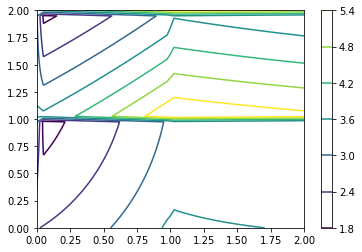

In [4]:
plt.contour(X_points, Y_points, np.array(Z).reshape(40, 40))
plt.colorbar()

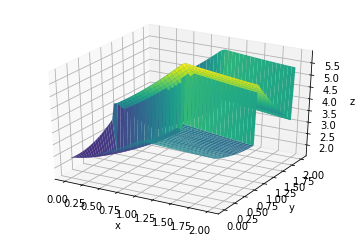

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X_points, Y_points, np.array(Z).reshape(40, 40),rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

## Change of fitness with respect to input gene values, smoothing with simple sinus


In [6]:
rv_params = tengp.Parameters(3, 1, 1, 1, funset, real_valued=True, smoothing_fn=lambda c: np.sin(np.pi*c))

Z = []

for x_v, y_v in zip(X_points, Y_points):
    for x_, y_ in zip(x_v, y_v):
        genes = [0.5, x_, y_, 3]
        individual = rv_params.individual_class(genes, bounds, rv_params)
        output = individual.transform(X)
        individual.fitness = mean_squared_error(output, y)
        Z.append(individual.fitness)

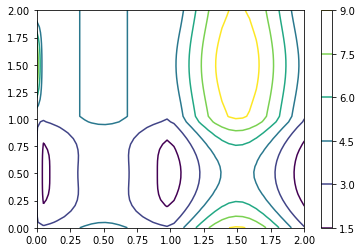

In [7]:
plt.contour(X_points, Y_points, np.array(Z).reshape(40, 40))
plt.colorbar()

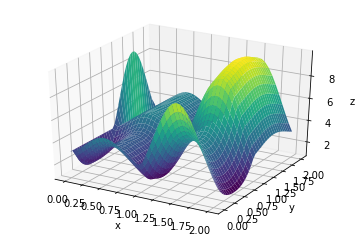

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X_points, Y_points, np.array(Z).reshape(40, 40),rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

## Change of fitness with respect to input gene values, smoothing with another sinus

Reference: https://stackoverflow.com/a/13098297/2144556

function: `f(x) = (sin(2 * π * (x - 1/4)) + 1) / 2`

In [9]:
rv_params = tengp.Parameters(3, 1, 1, 1, funset, real_valued=True,
                             smoothing_fn=lambda c: (np.sin(2 * np.pi * (c - 1/4)) + 1)/2  )

Z = []

for x_v, y_v in zip(X_points, Y_points):
    for x_, y_ in zip(x_v, y_v):
        genes = [0.5, x_, y_, 3]
        individual = rv_params.individual_class(genes, bounds, rv_params)
        output = individual.transform(X)
        individual.fitness = mean_squared_error(output, y)
        Z.append(individual.fitness)

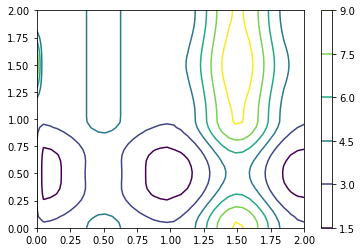

In [10]:
plt.contour(X_points, Y_points, np.array(Z).reshape(40, 40))
plt.colorbar()

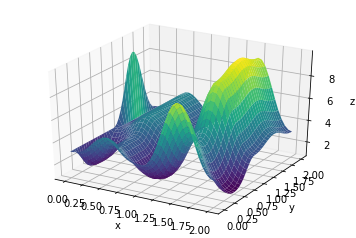

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X_points, Y_points, np.array(Z).reshape(40, 40),rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

## Change of fitness according to function values, no smoothing

Create an individual with single node, starting with all input nodes at 0 and with function node between add and subtract and output node fixed at the only function node output.

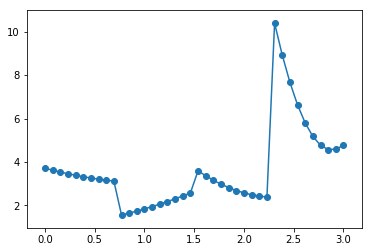

In [12]:
rv_params = tengp.Parameters(3, 1, 1, 1, funset, real_valued=True)

Y = []

for x in np.linspace(0, 4, 40):
    genes = [x, 0.5, 1.5, 3]
    individual = rv_params.individual_class(genes, bounds, rv_params)
    output = individual.transform(X)
    individual.fitness = mean_squared_error(output, y)
    Y.append(individual.fitness)

plt.plot(np.linspace(0, 3, 40), Y)
plt.scatter(np.linspace(0, 3, 40), Y)

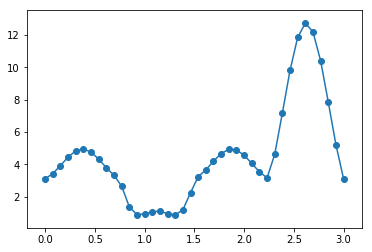

In [13]:
rv_params = tengp.Parameters(3, 1, 1, 1, funset, real_valued=True, smoothing_fn=lambda c: np.sin(np.pi*c))

Y = []

for x in np.linspace(0, 4, 40):
    genes = [x, 0.5, 1.5, 3]
    individual = rv_params.individual_class(genes, bounds, rv_params)
    output = individual.transform(X)
    individual.fitness = mean_squared_error(output, y)
    Y.append(individual.fitness)

plt.plot(np.linspace(0, 3, 40), Y)
plt.scatter(np.linspace(0, 3, 40), Y)

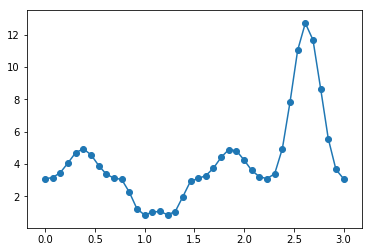

In [14]:
rv_params = tengp.Parameters(3, 1, 1, 1, funset, real_valued=True,
                             smoothing_fn=lambda c: (np.sin(2 * np.pi * (c - 1/4)) + 1)/2 )

Y = []

for x in np.linspace(0, 4, 40):
    genes = [x, 0.5, 1.5, 3]
    individual = rv_params.individual_class(genes, bounds, rv_params)
    output = individual.transform(X)
    individual.fitness = mean_squared_error(output, y)
    Y.append(individual.fitness)

plt.plot(np.linspace(0, 3, 40), Y)
plt.scatter(np.linspace(0, 3, 40), Y)

In [15]:
genes = [0.4, 0.5, 1.5, 3]
individual = rv_params.individual_class(genes, bounds, rv_params)
individual.transform(X)

array([[0.        ],
       [1.20601133],
       [0.        ],
       [1.20601133],
       [0.        ],
       [1.20601133],
       [0.        ],
       [1.20601133],
       [0.        ],
       [0.        ],
       [0.60300566],
       [0.60300566],
       [1.20601133],
       [1.20601133],
       [1.80901699],
       [1.80901699]])

In [16]:
genes = [0.9, 0.5, 1.5, 3]
individual = rv_params.individual_class(genes, bounds, rv_params)
individual.transform(X)

array([[0.        ],
       [0.127322  ],
       [0.        ],
       [0.127322  ],
       [0.        ],
       [0.127322  ],
       [0.        ],
       [0.127322  ],
       [0.        ],
       [0.        ],
       [0.063661  ],
       [0.063661  ],
       [0.127322  ],
       [0.127322  ],
       [0.19098301],
       [0.19098301]])

In [17]:
genes = [1, 0.5, 1.5, 3]
individual = rv_params.individual_class(genes, bounds, rv_params)
individual.transform(X)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])